# Predicción de valores NO2 en Barcelona en base a datos de Meteorología y Tráfico durante el 2020

### En este Notebook vamos a usar los datos del 2020 en Barcelona para aplicar sobre ellos las predicciones de nuestro modelo entrenado y guardado para NO2. Compararemos los resultados predichos con los valores reales que hubo de NO2.

In [1]:
#Cargamos las librerías que vamos a necesitar en el proceso

import numpy as np
import pandas as pd
from numpy import set_printoptions
#Visualización
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#Ensamblamiento Regresión
from sklearn.ensemble import ExtraTreesRegressor
#Metricas
from sklearn.metrics import mean_squared_error
#Serializar (guardar, cerrar y abrir modelo)
from joblib import load

## Carga y unión de datasets del 2020

In [2]:
#Cargamos el dataset de datos de Calidad Barcelona 2020

url_fichero_cal = '../../Contaminacion/datosContaminacionBarcelona/JupiterNoteBook/contaminacionBarcelona2020.csv'
dfContaminacionBarcelona = pd.read_csv(url_fichero_cal)
dfContaminacionBarcelona = dfContaminacionBarcelona.set_index('date')

In [3]:
#ahora cargamos el dataset de datos de Meteorología en Barcelona 2020

url_fichero_met = '../../Meteorologia/df_sinhoras_estacion_datos_diarios_bcn_2020.csv'
dfMeteoBarcelona = pd.read_csv(url_fichero_met)
dfMeteoBarcelona = dfMeteoBarcelona.set_index('fecha')
dfMeteoBarcelona.index.rename('date', inplace=True)
dfMeteoBarcelona = dfMeteoBarcelona.loc[dfMeteoBarcelona.indicativo =='0201D']

In [4]:
#por último cargamos el dataset con los datos de Trafico Barcelona 2020

url_fichero_traf = '../../Tráfico/Barcelona/DatosEstadoTraficoBarcelona_SinMadrugadas_2020.csv'
dfTraficoBarcelona = pd.read_csv(url_fichero_traf)
dfTraficoBarcelona = dfTraficoBarcelona.set_index('Fecha')
dfTraficoBarcelona.index.rename('date', inplace=True)

In [5]:
#Ahora unimos los 3 datasets en uno solo

dfMergeado = pd.merge(dfContaminacionBarcelona, dfMeteoBarcelona, left_index=True, right_index=True)
dfMergeado = pd.merge(dfMergeado, dfTraficoBarcelona, left_index=True, right_index=True)

# le eliminamos las columnas innecesarias o duplicadas
dfMergeado = dfMergeado.drop(columns=['month-day','ndia','indicativo','nombre','provincia','altitud','year_y','month_y'])
dfMergeado.rename(columns = {'year_x': 'year', 'month_x': 'month', 'Estado_Actual': 'estado_trafico'}, inplace = True)

## Aplicación del modelo entrenado para obtener predicciones

In [6]:
#Ahora preparamos el array y cargamos el Modelo entrenado

array = dfMergeado.drop(columns='season_name').values
X = array[:,2:]
y = array[:,1]

fichero_modeloJoblib = '../../Datos_Mergeados/Barcelona/Desechados/Modelo_finalizado_BarcelonaNO2.sav'
modelo_cargado = load(fichero_modeloJoblib)
resultado = modelo_cargado.score(X, y)
print("Resultado: " + str(resultado))

Resultado: 0.19587881948073282


34.61774217720252


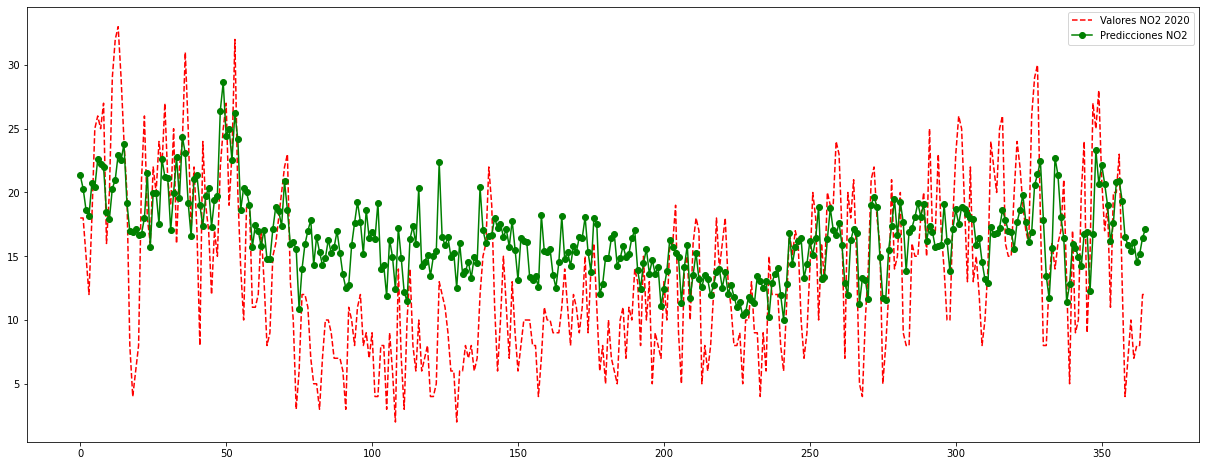

In [7]:
predicciones = modelo_cargado.predict(X)
print(mean_squared_error(y, predicciones))

plt.figure(figsize=(21, 8))

grafica = plt.plot(y,'--r',predicciones,'-og')
plt.legend(('Valores NO2 2020', 'Predicciones NO2'),
           loc='upper right')
plt.show;